# Optional Lab: Feature scaling and Learning Rate (Multi-variable)

## Objetivos
En este laboratorio usted:
- Utilizar las rutinas de variables múltiples desarrolladas en el laboratorio anterior
- ejecutar el descenso de gradiente en un conjunto de datos con múltiples características
- explorar el impacto de la *tasa de aprendizaje alfa* en el descenso por gradiente
- mejorar el rendimiento del descenso de gradiente mediante el *escalado de características* utilizando la normalización de z-score

Traducción realizada con la versión gratuita del traductor www.DeepL.com/Translator

## Goals
In this lab you will:
- Utilize  the multiple variables routines developed in the previous lab
- run Gradient Descent on a data set with multiple features
- explore the impact of the *learning rate alpha* on gradient descent
- improve performance of gradient descent by *feature scaling* using z-score normalization

## Herramientas
Utilizarás las funciones desarrolladas en el último laboratorio, así como matplotlib y NumPy. 
<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

## Tools
You will utilize the functions developed in the last lab as well as matplotlib and NumPy. 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

## Notacion


|General | Description| Python (if applicable) |
|:--------------|:------------------|:----------------------:|
| $a$           | Escalar, normal  ||
| $\mathbf{a}$ | vector, negrita                                                 ||
| $\mathbf{A}$  | Matriz, Mayuscula negrita                              ||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | Matriz ejemplos de entrenamiento   | `X_train` |   
|  $\mathbf{y}$  | Vector con valores exactos        | `y_train` 
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$ Enecimo ejemplo| `X[i]`, `y[i]`|
| m | Numero de ejemplos | `m`|
| n | Número de características en cada ejemplo | `n`|
|  $\mathbf{w}$  |  Parametro: weight (pesos),                       | `w`    |
|  $b$           |  Parametro : bias (sesgo)                         | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | El resultado de la evaluación del modelo en $\mathbf{x^{(i)}}$ parametrizado por $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` | 
|$\frac{\partial J(\mathbf{w},b)}{\partial w_j}$| el gradiente o la derivada parcial del coste con respecto a un parámetro $w_j$ |`dj_dw[j]`| 
|$\frac{\partial J(\mathbf{w},b)}{\partial b}$| el gradiente o la derivada parcial del coste con respecto a un parámetro $b$| `dj_db`|  



<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

## Notation

|General   Notation  | Description| Python (if applicable) |
|:--------------|:------------------|:----------------------:|
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                 ||
| $\mathbf{A}$ | matrix, bold capital                                         ||
| **Regression** |         |    |
|  $\mathbf{X}$ | training example maxtrix                  | `X_train` |   
|  $\mathbf{y}$  | training example  targets                | `y_train` 
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `X[i]`, `y[i]`|
| m | number of training examples | `m`|
| n | number of features in each example | `n`|
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the model evaluation at  $\mathbf{x}^{(i)}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` | 
|$\frac{\partial J(\mathbf{w},b)}{\partial w_j}$| the gradient or partial derivative of cost with respect to a parameter $w_j$ |`dj_dw[j]`| 
|$\frac{\partial J(\mathbf{w},b)}{\partial b}$| the gradient or partial derivative of cost with respect to a parameter $b$| `dj_db`|

# Planteamiento del problema

Al igual que en los laboratorios anteriores, se utilizará el ejemplo motivador de la predicción del precio de la vivienda. El conjunto de datos de entrenamiento contiene muchos ejemplos con 4 características (tamaño, dormitorios, pisos y edad) que se muestran en la siguiente tabla. Tenga en cuenta que, en este laboratorio, la característica Tamaño está en pies cuadrados, mientras que en los laboratorios anteriores se utilizaban 1000 pies cuadrados.  Este conjunto de datos es mayor que el del laboratorio anterior.

Nos gustaría construir un modelo de regresión lineal utilizando estos valores para poder predecir el precio de otras casas, por ejemplo, una casa de 1200 pies cuadrados, 3 dormitorios, 1 planta y 40 años de antigüedad.

|Tamaño (pies cuadrados) | Número de dormitorios | Número de plantas | Edad de la vivienda | Precio (miles de dólares) 
| ----------------| ------------------- |----------------- |--------------|----------------------- |  
| 952             | 2                   | 1                | 65           | 271.5                  |  
| 1244            | 3                   | 2                | 64           | 232                    |  
| 1947            | 3                   | 2                | 17           | 509.8                  |  
| ...             | ...                 | ...              | ...          | ...                    |



#  Problem Statement

As in the previous labs, you will use the motivating example of housing price prediction. The training data set contains many examples with 4 features (size, bedrooms, floors and age) shown in the table below. Note, in this lab, the Size feature is in sqft while earlier labs utilized 1000 sqft.  This data set is larger than the previous lab.

We would like to build a linear regression model using these values so we can then predict the price for other houses - say, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. 

##  Dataset: 
| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|----------------------- |  
| 952             | 2                   | 1                | 65           | 271.5                  |  
| 1244            | 3                   | 2                | 64           | 232                    |  
| 1947            | 3                   | 2                | 17           | 509.8                  |  
| ...             | ...                 | ...              | ...          | ...                    |


In [22]:
# load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

Veamos el conjunto de datos y sus características trazando cada característica frente al precio.

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>
Let's view the dataset and its features by plotting each feature versus price.

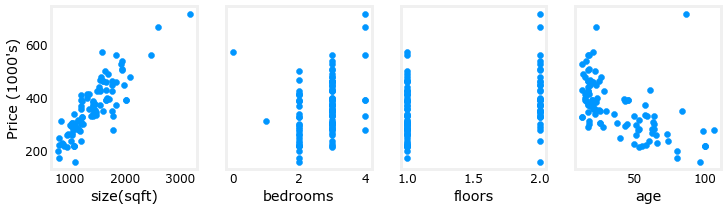

In [23]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

El trazado de cada característica frente al objetivo, el precio, proporciona alguna indicación de qué características tienen una mayor influencia en el precio. Por encima, el aumento del tamaño también incrementa el precio. Los dormitorios y los suelos no parecen tener un fuerte impacto en el precio. Las casas más nuevas tienen precios más altos que las más antiguas.

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>
Plotting each feature vs. the target, price, provides some indication of which features have the strongest influence on price. Above, increasing size also increases price. Bedrooms and floors don't seem to have a strong impact on price. Newer houses have higher prices than older houses.




## Descenso de gradiente con múltiples variables
Aquí están las ecuaciones que has desarrollado en el último laboratorio sobre el descenso de gradiente para múltiples variables.:


$$\begin{align*} \text{repite }&\text{hasta la convergencia:} \; \lbrace \newline\;
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{para  j = 0..n-1}\newline
&b\ \ := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

donde, n es el número de características, los parámetros $w_j$,  $b$, se actualizan simultáneamente y donde

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align}
$$
* m es el número de ejemplos de entrenamiento en el conjunto de datos
* $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ es la predicción del modelo, mientras que $y^{(i)}$ es el valor objetivo

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

<a name="toc_15456_5"></a>
## Gradient Descent With Multiple Variables
Here are the equations you developed in the last lab on gradient descent for multiple variables.:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j = 0..n-1}\newline
&b\ \ := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


## Learning Rate
<figure>
    <img src="./images/C1_W2_Lab06_learningrate.PNG" style="width:1200px;" >
</figure>

En las conferencias se discutieron algunas de las cuestiones relacionadas con el establecimiento de la tasa de aprendizaje $ \alpha $. La tasa de aprendizaje controla el tamaño de la actualización de los parámetros. Véase la ecuación (1) anterior. Es compartida por todos los parámetros.  

Vamos a ejecutar el descenso de gradiente y probar algunos ajustes de $\alpha$ en nuestro conjunto de datos

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

The lectures discussed some of the issues related to setting the learning rate $\alpha$. The learning rate controls the size of the update to the parameters. See equation (1) above. It is shared by all the parameters.  

Let's run gradient descent and try a few settings of $\alpha$ on our data set

### $\alpha$ = 9.9e-7

In [24]:
#set alpha to 9.9e-7
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha = 9.9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

Parece que la tasa de aprendizaje es demasiado alta.  La solución no converge. El coste es *increciente* en lugar de decreciente. Grafiquemos el resultado:

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

It appears the learning rate is too high.  The solution does not converge. Cost is *increasing* rather than decreasing. Let's plot the result:

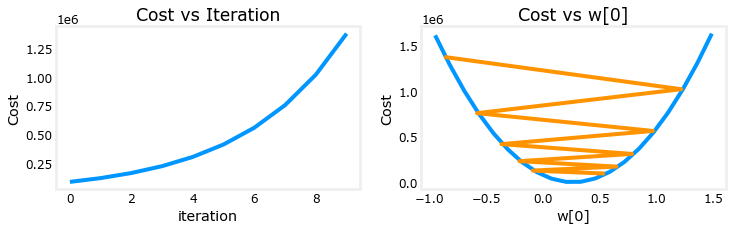

In [25]:
plot_cost_i_w(X_train, y_train, hist)

El gráfico de la derecha muestra el valor de uno de los parámetros, $w_0$. En cada iteración, se sobrepasa el valor óptimo y, como resultado, el coste acaba *aumentando* en lugar de acercarse al mínimo. Tenga en cuenta que esto no es una imagen completamente exacta, ya que hay 4 parámetros que se modifican en cada pasada en lugar de sólo uno. Este gráfico sólo muestra $w_0$ con los otros parámetros fijados en valores benignos. En este gráfico y en otros posteriores se puede observar que las líneas azul y naranja están ligeramente desviadas.

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

The plot on the right shows the value of one of the parameters, $w_0$. At each iteration, it is overshooting the optimal value and as a result, cost ends up *increasing* rather than approaching the minimum. Note that this is not a completely accurate picture as there are 4 parameters being modified each pass rather than just one. This plot is only showing $w_0$ with the other parameters fixed at benign values. In this and later plots you may notice the blue and orange lines being slightly off.


### $\alpha$ = 9e-7
Probemos con un valor más pequeño y veamos qué pasa.

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

Let's try a bit smaller value and see what happens.

In [26]:
#set alpha to 9e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.1e-05  2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.8e+02  5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.6e-04  4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.3e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  3.9e-05  2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.1e+02  4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.2e-04  4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66388e+04  5.0e-02  5.6e-05  2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02  4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  7.8e-04  3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -

El coste va disminuyendo a lo largo del recorrido, lo que demuestra que el alfa no es demasiado grande. 

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>
Cost is decreasing throughout the run showing that alpha is not too large. 

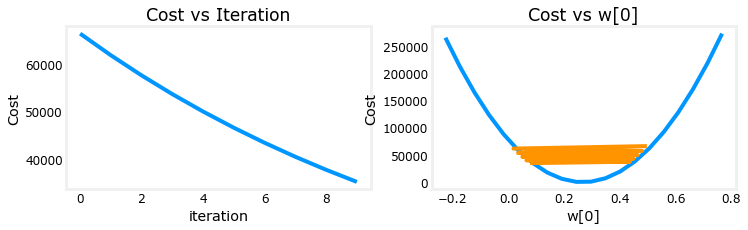

In [27]:
plot_cost_i_w(X_train, y_train, hist)

A la izquierda, se ve que el coste está disminuyendo como debería. A la derecha, se puede ver que $w_0$ todavía está oscilando alrededor del mínimo, pero está disminuyendo cada iteración en lugar de aumentar. Obsérvese arriba que `dj_dw[0]` cambia de signo con cada iteración a medida que `w[0]` salta sobre el valor óptimo.
Este valor alfa convergerá. Puedes variar el número de iteraciones para ver cómo se comporta.

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

On the left, you see that cost is decreasing as it should. On the right, you can see that $w_0$ is still oscillating around the minimum, but it is decreasing each iteration rather than increasing. Note above that `dj_dw[0]` changes sign with each iteration as `w[0]` jumps over the optimal value.
This alpha value will converge. You can vary the number of iterations to see how it behaves.

### $\alpha$ = 1e-7

Probemos con un valor un poco menor para $\alpha$ y veamos qué pasa.

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>
Let's try a bit smaller value for $\alpha$ and see what happens.

In [28]:
#set alpha to 1e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

El coste va disminuyendo a lo largo de la carrera, lo que demuestra que $\alpha$ no es demasiado grande. 

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>
Cost is decreasing throughout the run showing that $\alpha$ is not too large. 


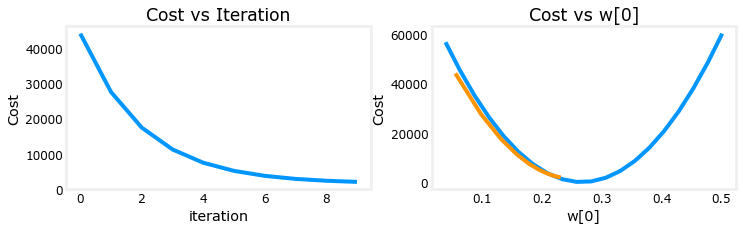

In [29]:
plot_cost_i_w(X_train,y_train,hist)

A la izquierda, se ve que el coste está disminuyendo como debería. A la derecha se puede ver que $w_0$ está disminuyendo sin cruzar el mínimo. Obsérvese que "dj_w0" es negativo durante todo el recorrido. Esta solución también converge, aunque no tan rápido como el ejemplo anterior.

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>
On the left, you see that cost is decreasing as it should. On the right you can see that $w_0$ is decreasing without crossing the minimum. Note above that `dj_w0` is negative throughout the run. This solution will also converge, though not quite as quickly as the previous example.

## Feature Scaling  (Escalado de características)
<figure>
    <img src="./images/C1_W2_Lab06_featurescalingheader.PNG" style="width:1200px;" >
</figure>
Las conferencias describen la importancia de reescalar el conjunto de datos para que las características tengan un rango similar.
Si está interesado en los detalles de por qué esto es así, haga clic en el encabezado "detalles" de abajo. Si no es así, la sección siguiente le mostrará una implementación de cómo hacer el escalado de características.

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

The lectures described the importance of rescaling the dataset so the features have a similar range.
If you are interested in the details of why this is the case, click on the 'details' header below. If not, the section below will walk through an implementation of how to do feature scaling.

<details>
<summary>
    <font size='3', color='darkgreen'><b>Detalles</b></font>
</summary>

Veamos de nuevo la situación con $\alpha$ = 9e-7. Esto es bastante cerca del valor máximo que podemos establecer $\alpha$ sin divergir. Esta es una carrera corta que muestra las primeras iteraciones:

<details><summary><font size="1" color=\"green\"<b>Texto original</b></font></summary>
Let's look again at the situation with $\alpha$ = 9e-7. This is pretty close to the maximum value we can set $\alpha$  to without diverging. This is a short run showing the first few iterations:
</details>


<figure>
    <img src="./images/C1_W2_Lab06_ShortRun.PNG" style="width:1200px;" >
</figure>

Arriba, mientras el coste se reduce, está claro que $w_0$ progresa más rápidamente que los otros parámetros debido a su gradiente mucho mayor.

El gráfico siguiente muestra el resultado de una ejecución muy larga con $\alpha$ = 9e-7. Esto lleva varias horas.


<details><summary><font size="1" color=\"green\"<b>Texto original</b></font></summary>


Above, while cost is being decreased, its clear that $w_0$ is making more rapid progress than the other parameters due to its much larger gradient.

The graphic below shows the result of a very long run with $\alpha$ = 9e-7. This takes several hours.

</details>


<figure>
    <img src="./images/C1_W2_Lab06_LongRun.PNG" style="width:1200px;" >
</figure>

Arriba, se puede ver que el coste disminuyó lentamente después de su reducción inicial. Observe la diferencia entre `w0` y `w1`, `w2`, `w3` así como `dj_dw0` y `dj_dw1-3`. El parámetro `w0` alcanza su valor casi final muy rápidamente y `dj_dw0` ha disminuido rápidamente a un valor pequeño mostrando que `w0` está cerca del valor final. Los otros parámetros se redujeron mucho más lentamente.

¿A qué se debe esto?  ¿Hay algo que podamos mejorar? Véase más abajo:


<details><summary><font size="1" color=\"green\"<b>Texto original</b></font></summary>


Above, you can see cost decreased slowly after its initial reduction. Notice the difference between `w0` and `w1`,`w2`,`w3` as well as  `dj_dw0` and `dj_dw1-3`. `w0` reaches its near final value very quickly and `dj_dw0` has quickly decreased to a small value showing that `w0` is near the final value. The other parameters were reduced much more slowly.

Why is this?  Is there something we can improve? See below:
</details>


<figure>
    <center> <img src="./images/C1_W2_Lab06_scale.PNG"   ></center>
</figure>   

La figura anterior muestra por qué los $w$ se actualizan de forma desigual. 
- $\alpha$ es compartido por todas las actualizaciones de parámetros ($w$'s y $b$).
- El término de error común se multiplica por las características de los $w$. (no $b$).
- las características varían significativamente en magnitud haciendo que algunas características se actualicen mucho más rápido que otras. En este caso, $w_0$ se multiplica por 'tamaño(pies cuadrados)', que suele ser > 1000, mientras que $w_1$ se multiplica por 'número de habitaciones', que suele ser 2-4. 
    
La solución es el escalado de características.


<details><summary><font size="1" color=\"green\"<b>Texto original</b></font></summary>

The figure above shows why $w$'s are updated unevenly. 
- $\alpha$ is shared by all parameter updates ($w$'s and $b$).
- the common error term is multiplied by the features for the $w$'s. (not $b$).
- the features vary significantly in magnitude making some features update much faster than others. In this case, $w_0$ is multiplied by 'size(sqft)', which is generally > 1000,  while $w_1$ is multiplied by 'number of bedrooms', which is generally 2-4. 
    
The solution is Feature Scaling.

</details>

En las conferencias se han tratado tres técnicas diferentes: 
- Escalado de características, esencialmente dividiendo cada característica positiva por su valor máximo, o más generalmente, reescalando cada característica por sus valores mínimos y máximos usando (x-min)/(max-min). Ambas formas normalizan las características en el rango de -1 y 1, donde el primer método funciona para las características positivas, que es simple y sirve bien para el ejemplo de la conferencia, y el último método funciona para cualquier característica.
- Normalización de la media: $x_i := \dfrac{x_i - \mu_i}{max - min} $ 
- Normalización de la puntuación Z, que exploraremos a continuación. 

<details><summary><font size="2" color=\"green\"<b>Texto original</b></font></summary>

The lectures discussed three different techniques: 
- Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and serves well for the lecture's example, and the latter method works for any features.
- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $ 
- Z-score normalization which we will explore below. 

### Normalización de la puntuación z (z-score normalization)
Después de la normalización de la puntuación z, todas las características tendrán una media de 0 y una desviación estándar de 1.

Para implementar la normalización de la puntuación z, ajuste sus valores de entrada como se muestra en esta fórmula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
donde $j$ selecciona una característica o una columna en la matriz $\mathbf{X}$. $µ_j$ es la media de todos los valores de la característica (j) y $\sigma_j$ es la desviación estándar de la característica (j).


$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2 
\end{align}
$$


<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2 
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

**Implementation**

In [30]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

Veamos los pasos de la normalización de la puntuación Z. El gráfico siguiente muestra la transformación paso a paso.



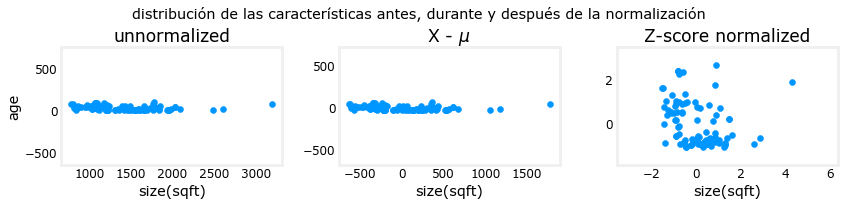

In [31]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribución de las características antes, durante y después de la normalización")
plt.show()

El gráfico anterior muestra la relación entre dos de los parámetros del conjunto de entrenamiento, "edad" y "tamaño (pies cuadrados)". *Se han representado con la misma escala*. 
- Izquierda: sin normalizar: El rango de valores o la varianza de la característica "size(sqft)" es mucho mayor que la de la edad
- En el medio: El primer paso elimina el valor medio o promedio de cada característica. Esto deja características centradas en torno a cero. Es difícil ver la diferencia para la característica 'edad', pero 'tamaño(pies cuadrados)' está claramente alrededor de cero.
- A la derecha: El segundo paso divide por la varianza. Esto deja ambas características centradas en cero con una escala similar.


<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

The plot above shows the relationship between two of the training set parameters, "age" and "size(sqft)". *These are plotted with equal scale*. 
- Left: Unnormalized: The range of values or the variance of the 'size(sqft)' feature is much larger than that of age
- Middle: The first step removes the mean or average value from each feature. This leaves features that are centered around zero. It's difficult to see the difference for the 'age' feature, but 'size(sqft)' is clearly around zero.
- Right: The second step divides by the variance. This leaves both features centered at zero with a similar scale.

Vamos a normalizar los datos y a compararlos con los datos originales.

In [32]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma = [411.62   0.65   0.49  25.78]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


The peak to peak range of each column is reduced from a factor of thousands to a factor of 2-3 by normalization.

El rango de pico a pico de cada columna se reduce de un factor de miles a un factor de 2-3 mediante la normalización.

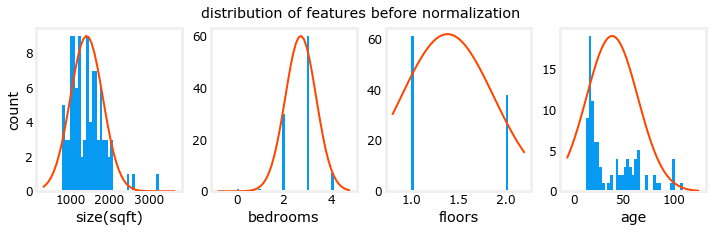

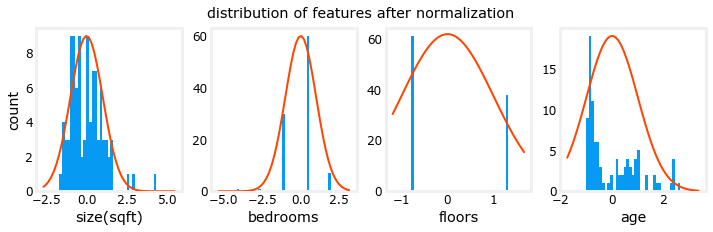

In [33]:
fig, ax = plt.subplots(1, 4, figsize = (12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()

fig, ax = plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")
plt.show()

Obsérvese que el rango de los datos normalizados (eje x) se centra en torno a cero y aproximadamente en +/- 2. Lo más importante es que el rango es similar para cada característica.

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

Notice, above, the range of the normalized data (x-axis) is centered around zero and roughly +/- 2. Most importantly, the range is similar for each feature.



Volvamos a ejecutar nuestro algoritmo de descenso de gradiente con datos normalizados.
Obsérvese el **valor mucho mayor de alfa**. Esto acelerará el descenso del gradiente.

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

Let's re-run our gradient descent algorithm with normalized data.
Note the **vastly larger value of alpha**. This will speed up gradient descent.


In [34]:
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.6e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

Las características escaladas obtienen resultados muy precisos **mucho, mucho más rápido**. Fíjate en que el gradiente de cada parámetro es minúsculo al final de este corto recorrido. Una tasa de aprendizaje de 0,1 es un buen comienzo para la regresión con características normalizadas.
Vamos a trazar nuestras predicciones frente a los valores objetivo. Tenga en cuenta que la predicción se hace utilizando la característica normalizada, mientras que el gráfico se muestra utilizando los valores originales de la característica.



<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

The scaled features get very accurate results **much, much faster!**. Notice the gradient of each parameter is tiny by the end of this fairly short run. A learning rate of 0.1 is a good start for regression with normalized features.
Let's plot our predictions versus the target values. Note, the prediction is made using the normalized feature while the plot is shown using the original feature values.

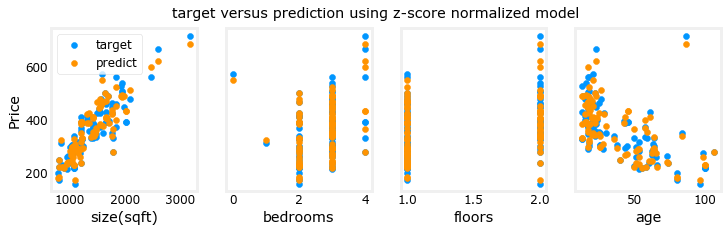

In [35]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

Los resultados parecen buenos. Algunos puntos a tener en cuenta:
- con múltiples características, ya no podemos tener un único gráfico que muestre los resultados frente a las características.
- Al generar el gráfico, se utilizaron las características normalizadas. Cualquier predicción que utilice los parámetros aprendidos a partir de un conjunto de entrenamiento normalizado también debe ser normalizada.

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

The results look good. A few points to note:
- with multiple features, we can no longer have a single plot showing results versus features.
- when generating the plot, the normalized features were used. Any predictions using the parameters learned from a normalized training set must also be normalized.

**Predicción**
El objetivo de generar nuestro modelo es utilizarlo para predecir los precios de las viviendas que no están en el conjunto de datos. Vamos a predecir el precio de una casa de 1200 pies cuadrados, 3 dormitorios, 1 piso, 40 años de antigüedad. Recordemos que debemos normalizar los datos con la media y la desviación estándar derivadas cuando se normalizaron los datos de entrenamiento. 

<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

**Prediction**
The point of generating our model is to use it to predict housing prices that are not in the data set. Let's predict the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. Recall, that you must normalize the data with the mean and standard deviation derived when the training data was normalized. 

In [36]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-0.53  0.43 -0.79  0.06]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709


**Cost Contours**  
<img align="left" src="./images/C1_W2_Lab06_contours.PNG"   style="width:240px;" >Otra forma de ver el escalado de las características es en términos de los contornos de los costes. Cuando las escalas de las características no coinciden, el gráfico del coste frente a los parámetros en un gráfico de contornos es asimétrico. 

En el siguiente gráfico, la escala de los parámetros coincide. El gráfico de la izquierda es el gráfico de contorno del coste de w[0], los pies cuadrados, frente a w[1], el número de habitaciones antes de normalizar las características. El gráfico es tan asimétrico que las curvas que completan los contornos no son visibles. En cambio, cuando las características se normalizan, el contorno de los costes es mucho más simétrico. El resultado es que las actualizaciones de los parámetros durante el descenso de gradiente pueden progresar por igual para cada parámetro. 


<details><summary><font size=\"2\" color=\"green\"<b>Texto original</b></font></summary>

Another way to view feature scaling is in terms of the cost contours. When feature scales do not match, the plot of cost versus parameters in a contour plot is asymmetric. 

In the plot below, the scale of the parameters is matched. The left plot is the cost contour plot of w[0], the square feet versus w[1], the number of bedrooms before normalizing the features. The plot is so asymmetric, the curves completing the contours are not visible. In contrast, when the features are normalized, the cost contour is much more symmetric. The result is that updates to parameters during gradient descent can make equal progress for each parameter. 


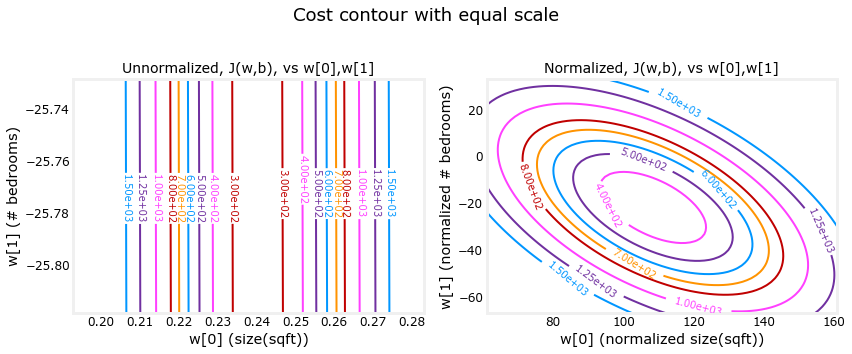

In [37]:
plt_equal_scale(X_train, X_norm, y_train)


## Congratulations!
In this lab you:
- utilized the routines for linear regression with multiple features you developed in previous labs
- explored the impact of the learning rate  $\alpha$ on convergence 
- discovered the value of feature scaling using z-score normalization in speeding convergence

## Acknowledgments
The housing data was derived from the [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) compiled by Dean De Cock for use in data science education.